## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## **Downloading Dataset**

In [3]:
!wget https://raw.githubusercontent.com/DataScienceRoadMapDSRM/Tableau-Dashboards-info/main/netflix_titles.csv

--2024-01-29 17:58:03--  https://raw.githubusercontent.com/DataScienceRoadMapDSRM/Tableau-Dashboards-info/main/netflix_titles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2410660 (2.3M) [text/plain]
Saving to: ‘netflix_titles.csv’

netflix_titles.csv  100%[===================>]   2.30M  --.-KB/s    in 0.06s   

2024-01-29 17:58:04 (38.8 MB/s) - ‘netflix_titles.csv’ saved [2410660/2410660]



## **Loading & Preprocessing Data**

In [4]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

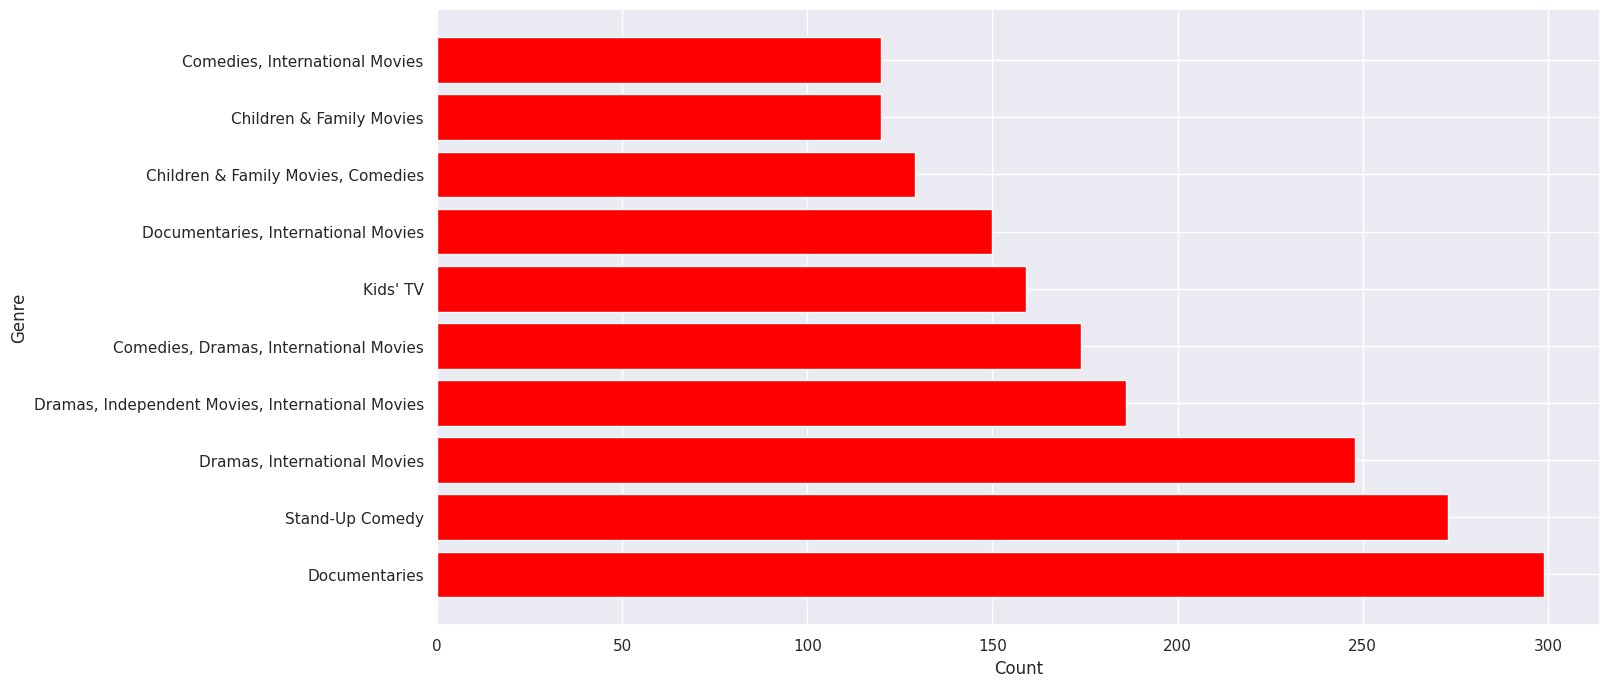

In [18]:
top_10_genres = df['listed_in'].value_counts().sort_values(ascending = False)[:10]

index = top_10_genres.index
values = top_10_genres.values

plt.figure(figsize = (15, 8))
plt.barh(index, values, color='red')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [12]:
print(top_10_genres)

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Name: listed_in, dtype: int64


Top Genres are:
*Documentaries, Stand-Up, Dramas & International Movies.*

In [13]:
print(top_10_genres.index)

Index(['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Dramas, Independent Movies, International Movies',
       'Comedies, Dramas, International Movies', 'Kids' TV',
       'Documentaries, International Movies',
       'Children & Family Movies, Comedies', 'Children & Family Movies',
       'Comedies, International Movies'],
      dtype='object')


In [14]:
print(top_10_genres.values)

[299 273 248 186 174 159 150 129 120 120]


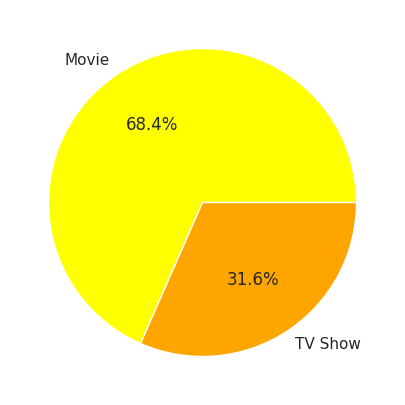

In [27]:
types = df['type'].value_counts()

content_type = types.index
count = types.values

plt.figure(figsize = (8, 5))
plt.pie(count, labels=content_type, autopct='%1.1f%%', colors=['yellow', 'orange'])
plt.show()

Most of the content is : *Movies*

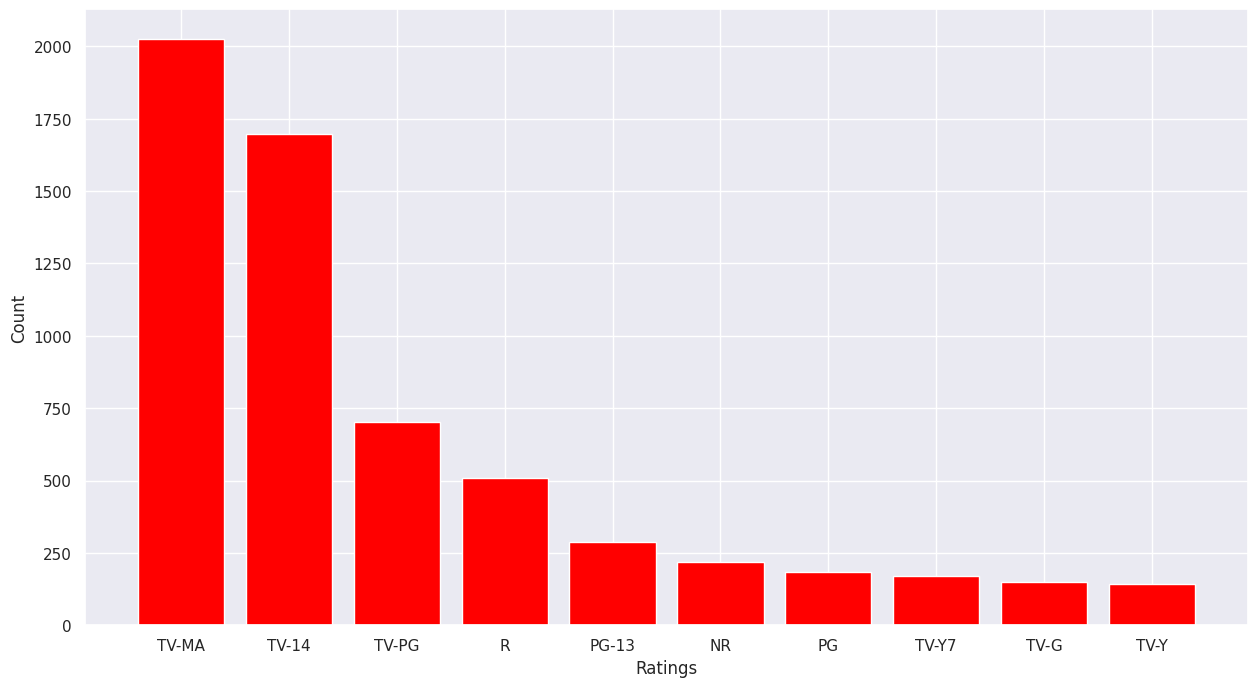

In [34]:
rat = df['rating'].value_counts().sort_values(ascending = False)[:10]

index = rat.index
values = rat.values

plt.figure(figsize = (15, 8))
plt.bar(index, values, color='red')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Most of the content has: *TV-MA* and *TV-14* rating.

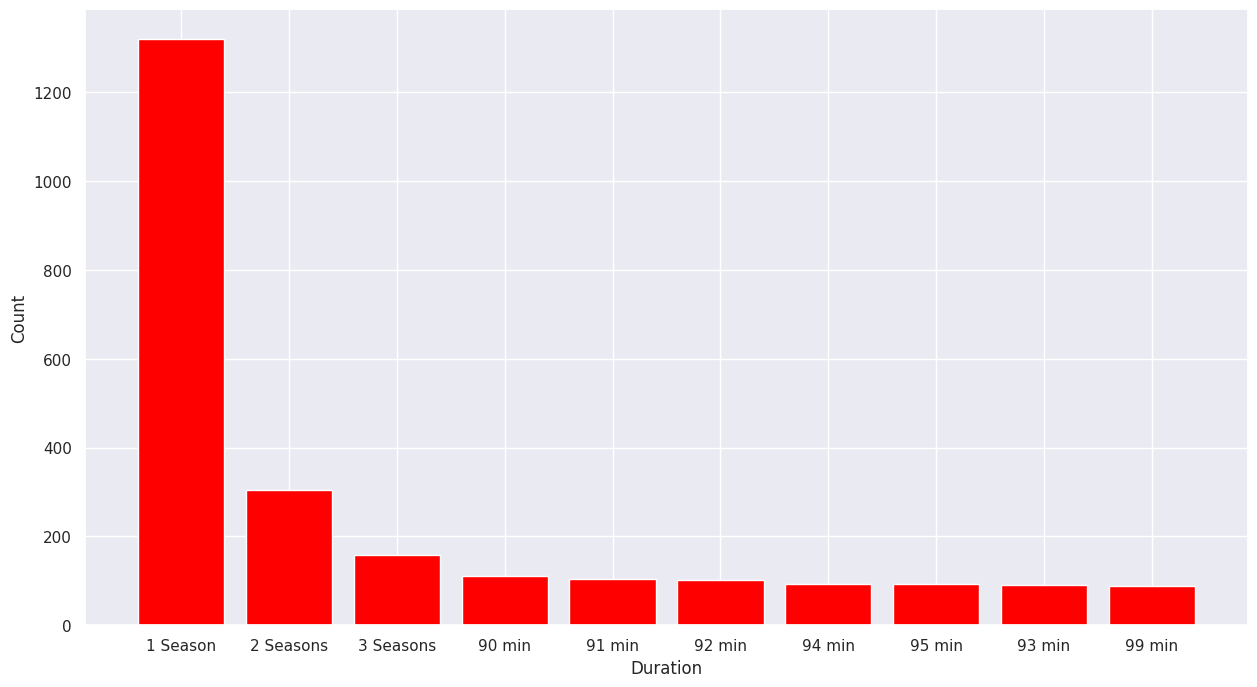

In [33]:
duration = df['duration'].value_counts().sort_values(ascending = False)[:10]

index = duration.index
value = duration.values

plt.figure(figsize = (15, 8))
plt.bar(index, value, color='red')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

Most of the TV Shows and Movies are of 1 Season.

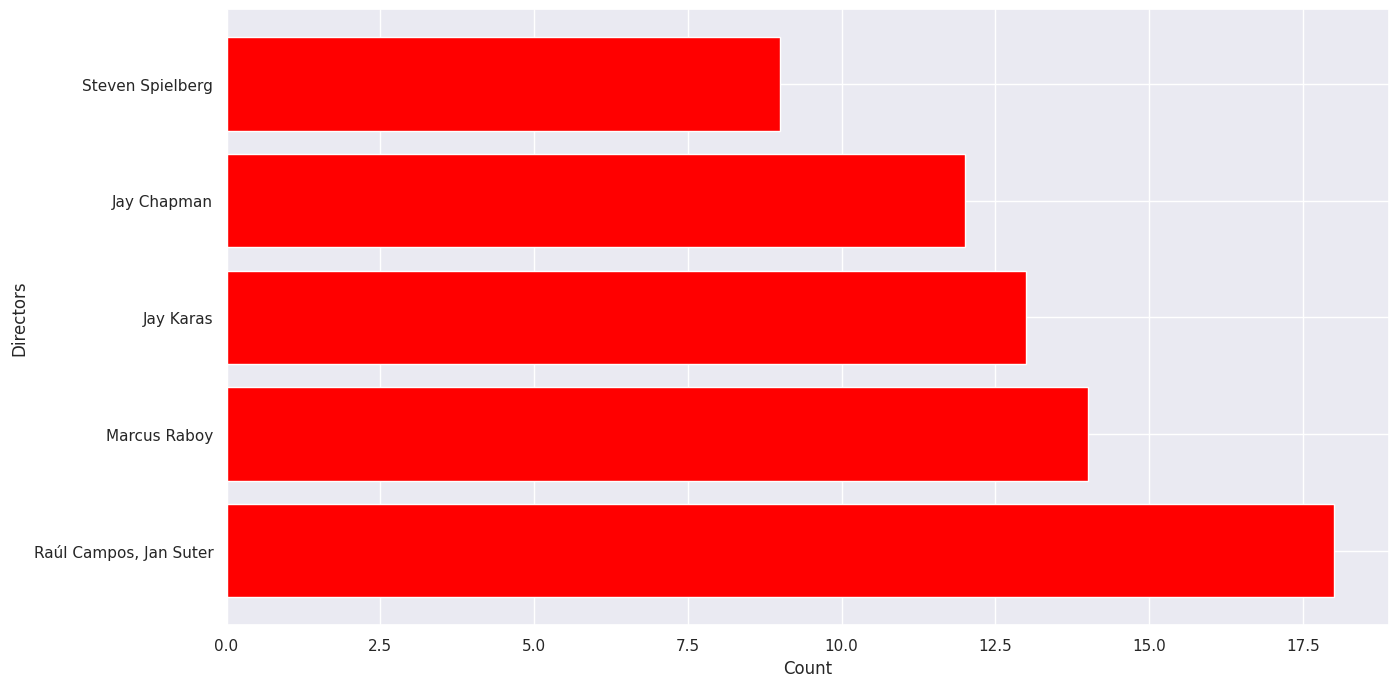

In [35]:
top_5_dir = df['director'].value_counts().sort_values(ascending = False)[:5]

index = top_5_dir.index
values = top_5_dir.values

plt.figure(figsize = (15, 8))
plt.barh(index, values, color = 'red')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()

Most movie/tv-shows are directed by: *Raul Campos*